<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Neural-Networks-And-Deep-Learning/blob/master/Multi_class_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Classification using Neural Networks - Dataset = MNIST

In [2]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [6]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [7]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [8]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

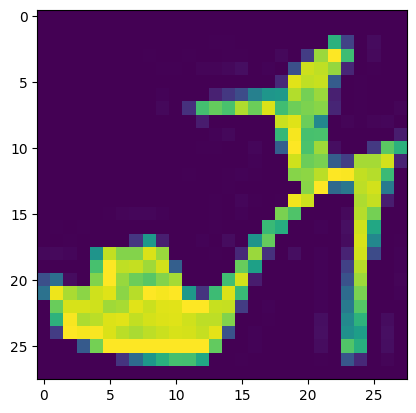

In [11]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[9]);

In [12]:
# Check our samples label
train_labels[7]

2

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

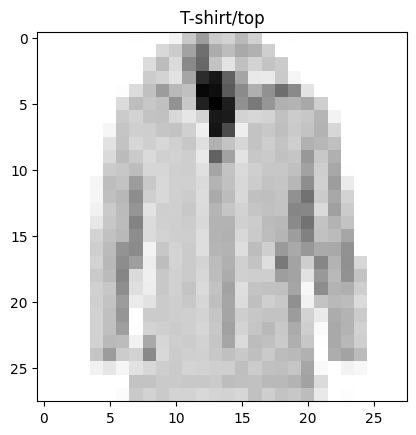

In [14]:
# Plot an example image and its label
plt.imshow(train_data[19], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

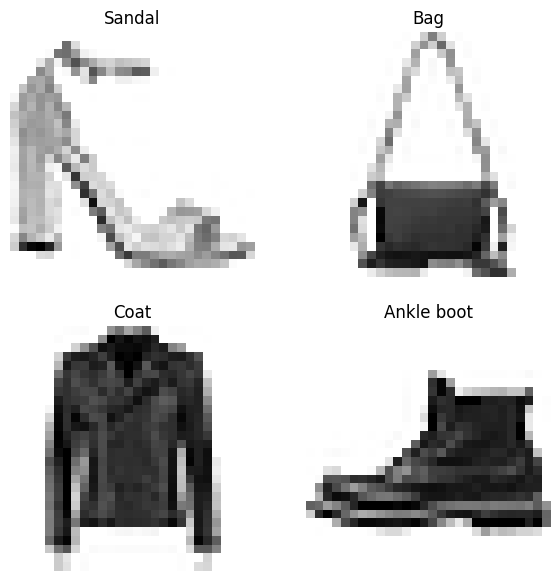

In [15]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                batch_size= 32,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set duri

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8093 - accuracy: 0.5194 - val_loss: 1.0746 - val_accuracy: 0.5878
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9339 - accuracy: 0.6357 - val_loss: 0.8320 - val_accuracy: 0.6646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7751 - accuracy: 0.6928 - val_loss: 0.7660 - val_accuracy: 0.6957
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6912 - accuracy: 0.7235 - val_loss: 0.7583 - val_accuracy: 0.7012
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6167 - accuracy: 0.7533 - val_loss: 0.6534 - val_accuracy: 0.7563
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5599 - accuracy: 0.7857 - val_loss: 0.5828 - val_accuracy: 0.8005
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5210 - accuracy: 0.8130 - val_loss: 0.5255 - val_accuracy:

In [19]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 10)                260       
                                                                 
Total params: 40785 (159.32 KB)
Trainable params: 40785 (159.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Performing Normalization to get the best results**

In [20]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5290 - accuracy: 0.8129 - val_loss: 0.4462 - val_accuracy: 0.8412
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3944 - accuracy: 0.8584 - val_loss: 0.4799 - val_accuracy: 0.8374
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8687 - val_loss: 0.3935 - val_accuracy: 0.8569
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3371 - accuracy: 0.8768 - val_loss: 0.3889 - val_accuracy: 0.8589
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3222 - accuracy: 0.8809 - val_loss: 0.3933 - val_accuracy: 0.8570
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3081 - accuracy: 0.8868 - val_loss: 0.3924 - val_accuracy: 0.8545
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2979 - accuracy: 0.8895 - val_loss: 0.4118 - val_accuracy:

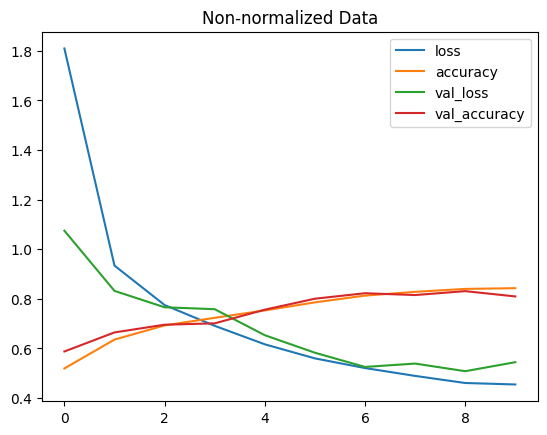

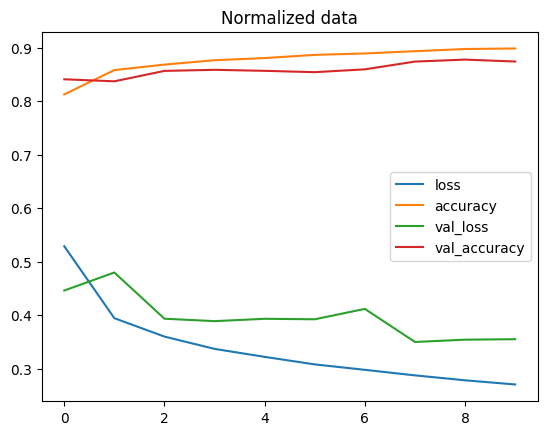

In [22]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [31]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [26]:
# Make predictions with the most recent model
y_probs = model_12.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.7704066e-07, 9.0780752e-09, 7.0001597e-08, 1.1421134e-07,
        2.6595773e-08, 7.7410676e-03, 3.0452622e-08, 1.0636185e-02,
        2.9884131e-06, 9.8161912e-01],
       [6.8398399e-06, 2.0158368e-11, 9.9782962e-01, 2.1428104e-09,
        1.4511897e-03, 4.0034204e-12, 7.1240595e-04, 3.9340742e-24,
        3.0174033e-11, 1.2134189e-21],
       [6.4952445e-07, 9.9999911e-01, 2.8629103e-08, 1.2268536e-07,
        1.0790351e-09, 2.7807211e-18, 1.0635611e-09, 5.9054266e-20,
        6.3216787e-09, 3.2095569e-15],
       [2.6163316e-06, 9.9985933e-01, 6.5216855e-06, 1.3060785e-04,
        7.3295183e-07, 2.4880816e-13, 6.8614632e-08, 1.1535083e-14,
        1.7965817e-07, 2.3972165e-11],
       [1.7894742e-01, 2.9902363e-09, 7.5704632e-03, 1.0197688e-04,
        8.9104462e-04, 4.1797301e-07, 8.0976832e-01, 2.7337105e-08,
        2.7203576e-03, 1.0240763e-08]], dtype=float32)

In [27]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]


(9, 'Ankle boot')

In [28]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [29]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[885,   0,  17,  34,   3,   1,  51,   0,   9,   0],
       [  4, 965,   2,  22,   5,   0,   0,   0,   2,   0],
       [ 20,   3, 733,  16, 181,   0,  45,   0,   1,   1],
       [ 24,   6,   7, 914,  27,   0,  15,   0,   7,   0],
       [  0,   0,  67,  40, 867,   0,  23,   0,   3,   0],
       [  0,   0,   0,   0,   0, 971,   0,  16,   1,  12],
       [181,   2, 100,  35, 125,   1, 543,   0,  13,   0],
       [  0,   0,   0,   0,   0,  25,   0, 944,   0,  31],
       [  7,   0,   2,   6,   3,   4,   2,   3, 973,   0],
       [  0,   0,   0,   0,   0,  19,   1,  31,   0, 949]])

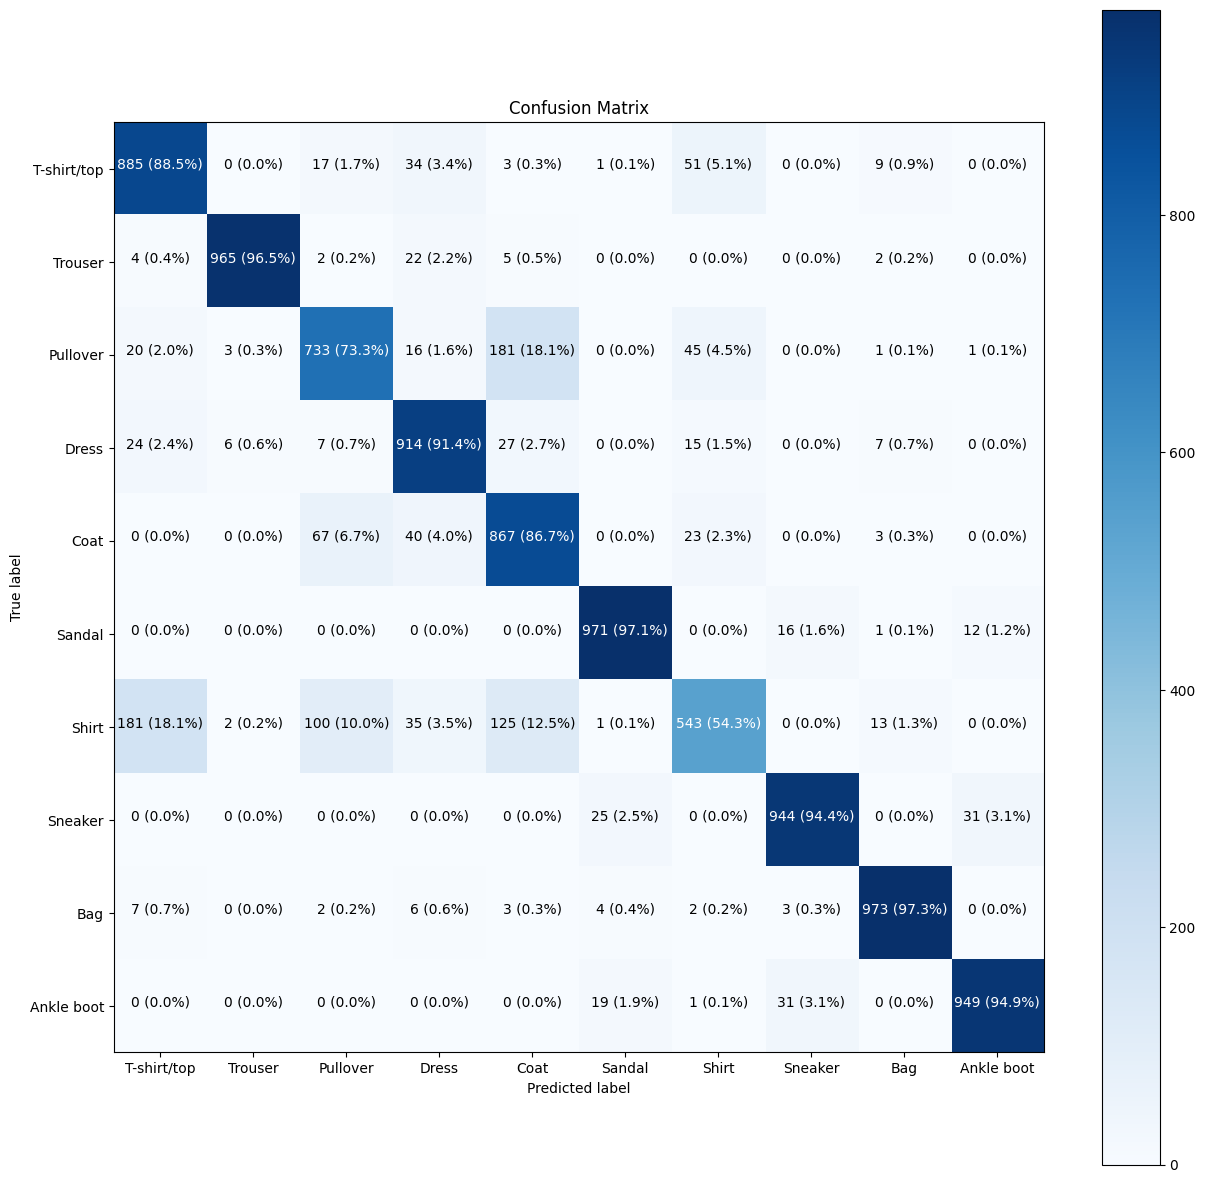

In [32]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [36]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 19ms/step


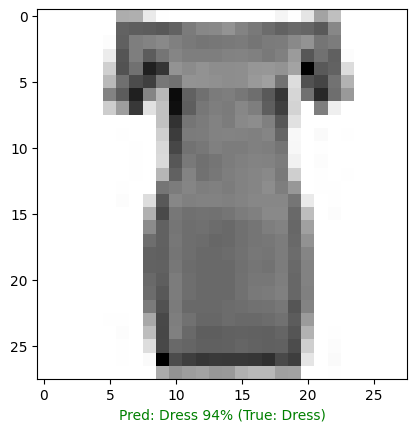

In [37]:
# Check out a random image as well as its prediction
plot_random_image(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)